In [1]:
K import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=r"C:\Users\singh\Downloads\Visadataset.csv"
visa_df=pd.read_csv(data)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat=visa_df.select_dtypes(include='object').columns.tolist()
num=visa_df.select_dtypes(exclude='object').columns.tolist()
cat,num

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

**Continent column analysis**

In [4]:
visa_df['continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [5]:
visa_df['continent'].values

array(['Asia', 'Asia', 'Asia', ..., 'Asia', 'Asia', 'Asia'], dtype=object)

In [6]:
visa_df[['continent']]

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


**unique**

In [7]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [8]:
visa_df['continent'].unique().tolist()

['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']

In [9]:
visa_df['continent'].nunique()

6

**Frequency Table**

In [10]:
# Total number of classes : 6
# Total number of rows : 25480
# Different count of visa applications are from different companies
# How many applications are from asia

con=visa_df['continent']=='Asia'
con

0         True
1         True
2         True
3         True
4        False
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: continent, Length: 25480, dtype: bool

In [11]:
len(visa_df[con])

16861

In [12]:
# step:1
visa_df
# step:2
visa_df['continent']
# step:3
con=visa_df['continent']=='Asia'
# step:4
visa_df[con]
# step:5
len(visa_df[con])

16861

In [13]:
cont=visa_df['continent'].unique()
# ['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']
l1=[]
for i in cont:
    con=visa_df['continent']==i
    val=len(visa_df[con])
    l1.append(val)
print(cont)
print(l1)

['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
[16861, 551, 3292, 3732, 852, 192]


In [14]:
ft=pd.DataFrame(zip(cont,l1),columns=['Class','Frequency'])
ft.to_csv('continent_frequency.csv',index=False)

In [19]:
pd.read_csv('continent_frequency.csv')

,Class,Frequency
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


**Value counts**

In [20]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [21]:
labels=visa_df['continent'].value_counts().keys()
count=visa_df['continent'].value_counts().values
len(labels),len(count)

(6, 6)

In [22]:
pd.DataFrame([labels,count])

,0,1,2,3,4,5
0,Asia,Europe,North America,South America,Africa,Oceania
1,16861,3732,3292,852,551,192


**Bar Chart**

<BarContainer object of 6 artists>

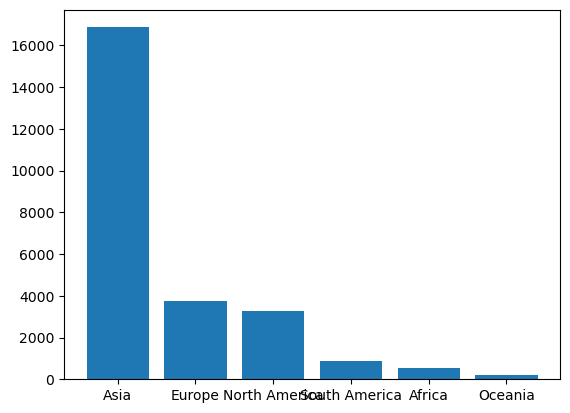

In [23]:
plt.bar(labels,count)

<BarContainer object of 6 artists>

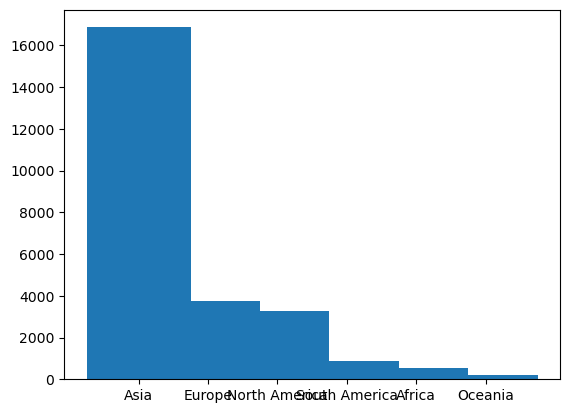

In [24]:
plt.bar(labels,count,width=1.5)

<BarContainer object of 6 artists>

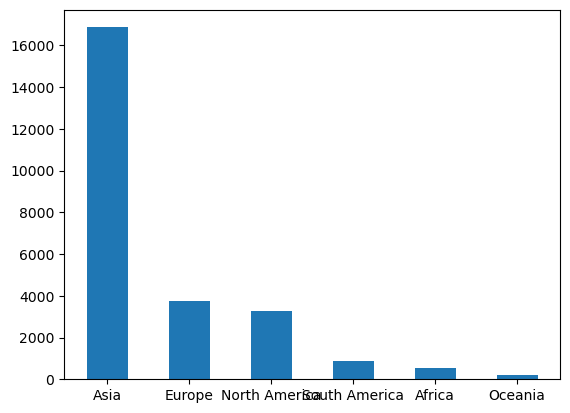

In [25]:
plt.bar(labels,count,width=.5)

<BarContainer object of 6 artists>

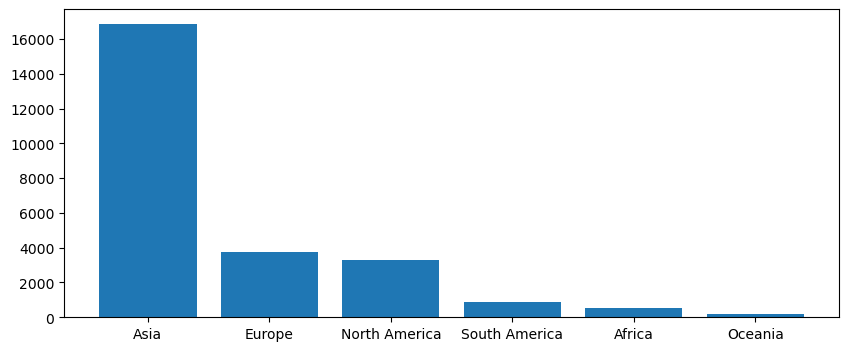

In [26]:
plt.figure(figsize=(10,4))
plt.bar(labels,count)

Text(0.5, 1.0, 'Continent_barchart')

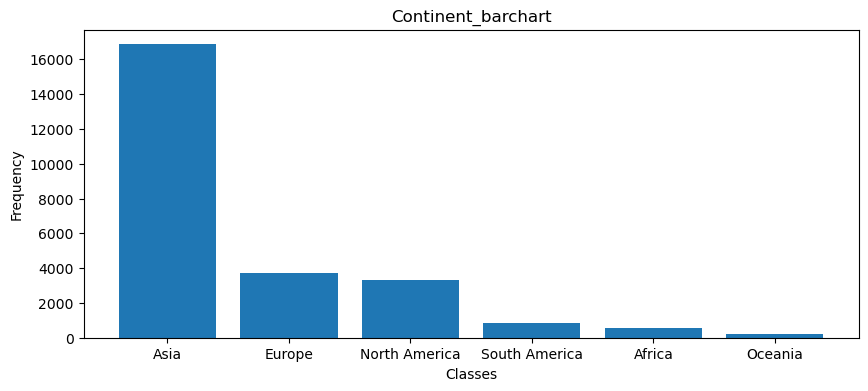

In [27]:
plt.figure(figsize=(10,4))
plt.bar(labels,count)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Continent_barchart')

Text(0.5, 1.0, 'Continent_barchart')

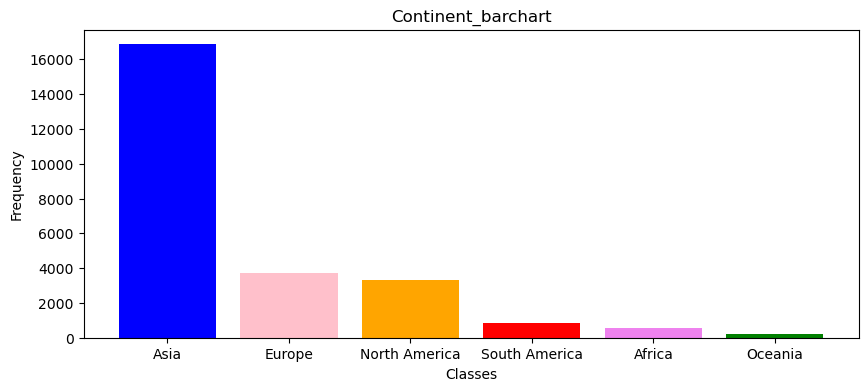

In [28]:
plt.figure(figsize=(10,4))
col=['blue','pink','orange','red','violet','green']
plt.bar(labels,count,color=col)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Continent_barchart')

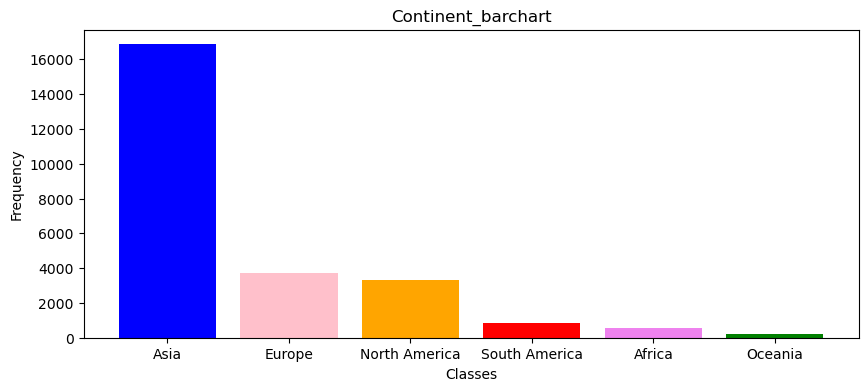

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
col=['blue','pink','orange','red','violet','green']
plt.bar(labels,count,color=col)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Continent_barchart')
plt.savefig('continent_barchart.jpg')
plt.show() # after plt.show no line will be executed

**Relative Frequency Table**

In [30]:
visa_df['continent'].value_counts(normalize=True)*100 # then we got count percentages 

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

In [31]:
cols=visa_df['continent'].value_counts(normalize=True)*100
cols.keys().tolist()

['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Oceania']

**Pie Chart**

- for pie chart we need values and keys



In [32]:
keys = (visa_df['continent'].value_counts(normalize=True)*100).keys().tolist()
values = (visa_df['continent'].value_counts(normalize=True)*100).values.tolist()

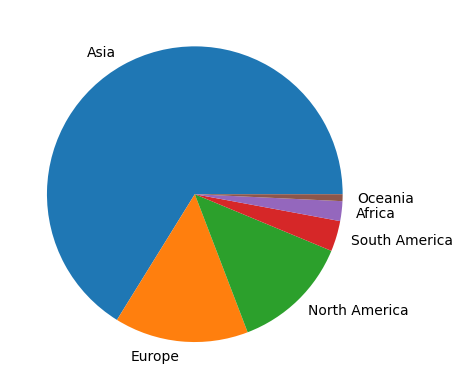

In [33]:
# autopct='%1.0f'
plt.pie(values,
        labels=keys,
       )
plt.show()

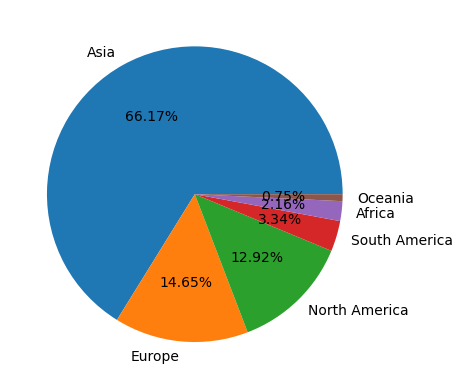

In [34]:
plt.pie(values,
        labels=keys,
       autopct='%1.2f%%')
plt.show()

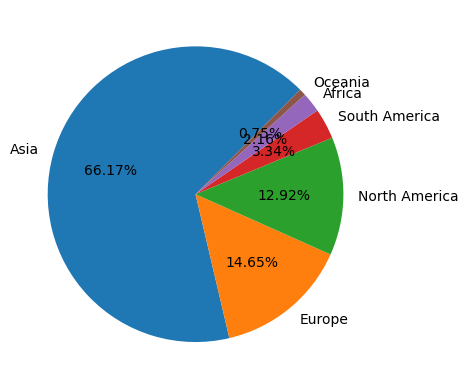

In [35]:
plt.pie(values,
        labels=keys,
       autopct='%1.2f%%',
       startangle=45)
plt.show()

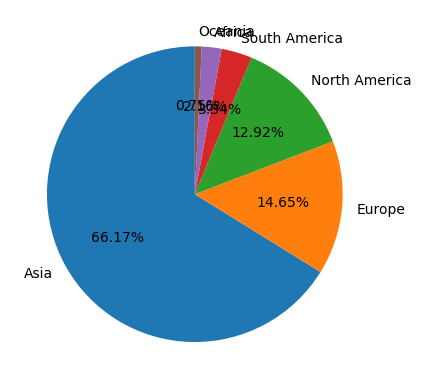

In [36]:
plt.pie(values,
        labels=keys,
       autopct='%1.2f%%',
       startangle=90)
plt.show()

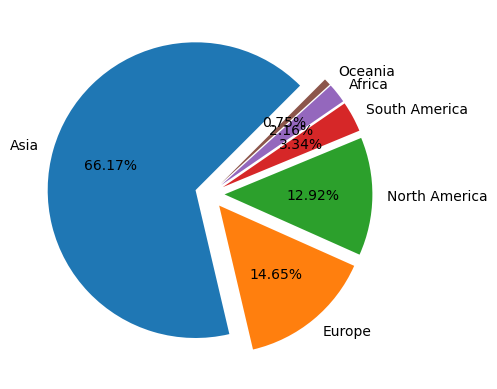

In [37]:
plt.pie(values,
        labels=keys,
       autopct='%1.2f%%',
       startangle=45,
       explode=[0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

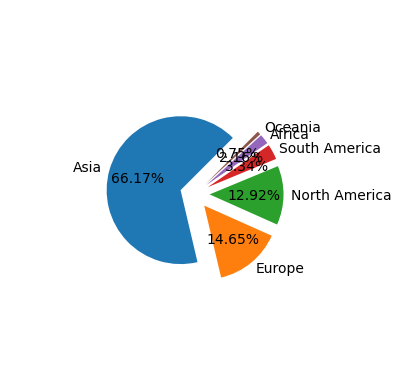

In [38]:
plt.pie(values,
        labels=keys,
       autopct='%1.2f%%',
       startangle=45,
       explode=[0.1,0.1,0.1,0.1,0.1,0.1],
       radius=0.5)
plt.show()

**Subplots**

<Axes: >

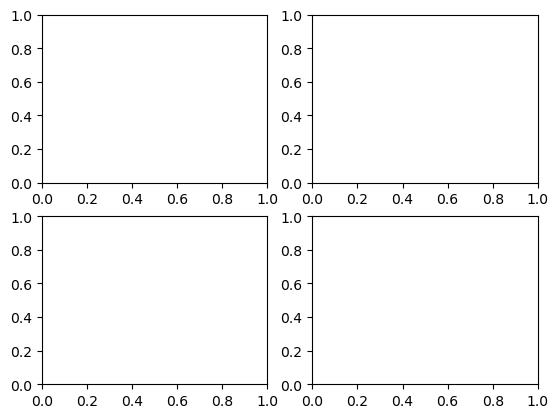

In [39]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

ValueError: num must be an integer with 1 <= num <= 4, not 5

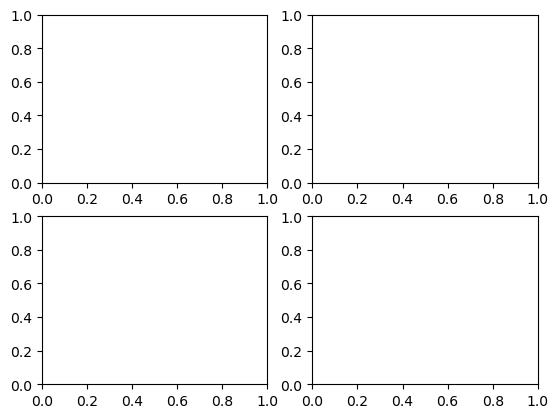

In [40]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)
plt.subplot(2,2,5)

In [ ]:
plt.subplot(1,2,1)
plt.subplot(1,2,2)
plt.subplot(1,2,3)
plt.subplot(1,2,4)

In [ ]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)

In [ ]:
#take the bar chart code of a continent
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(keys,values)
plt.xlabel('classes')
plt.ylabel('Frequency')
plt.title('Continent_barchart')
plt.show()

In [ ]:
visa_df['case_id'].nunique()

In [ ]:
plt.subplot(3,3,1)
plt.subplot(3,3,2)
plt.subplot(3,3,3)

plt.subplot(3,3,i)

In [ ]:
len(cat)

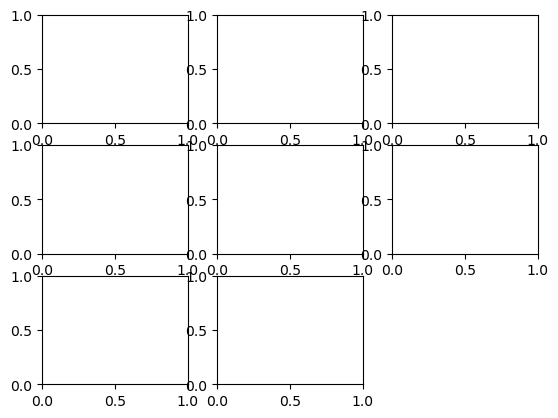

In [41]:
for i in range(len(cat)-1):
    plt.subplot(3,3,i+1)

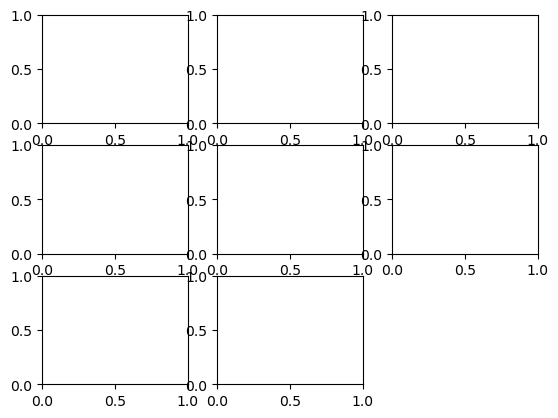

In [42]:
for i in range(1,len(cat)):
    plt.subplot(3,3,i)

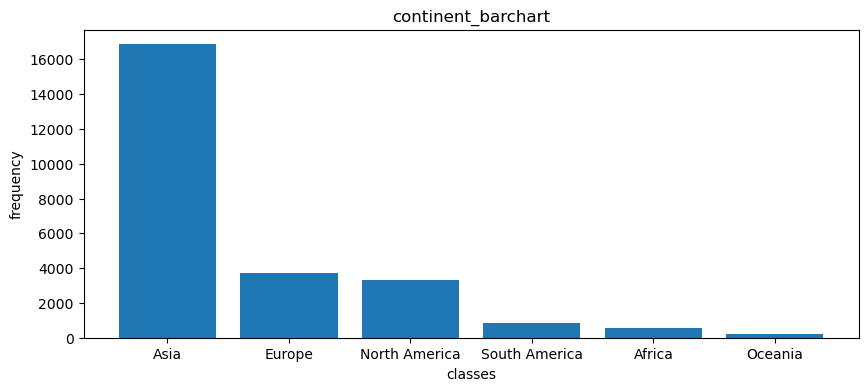

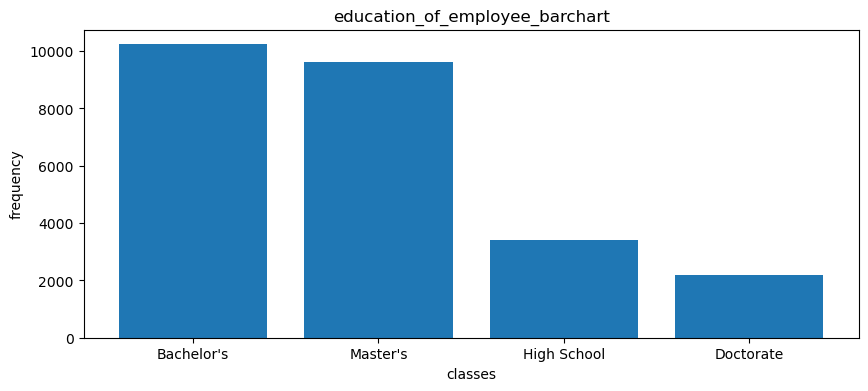

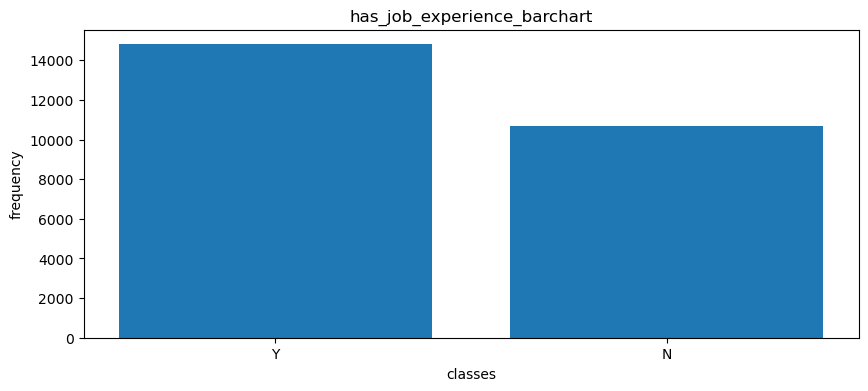

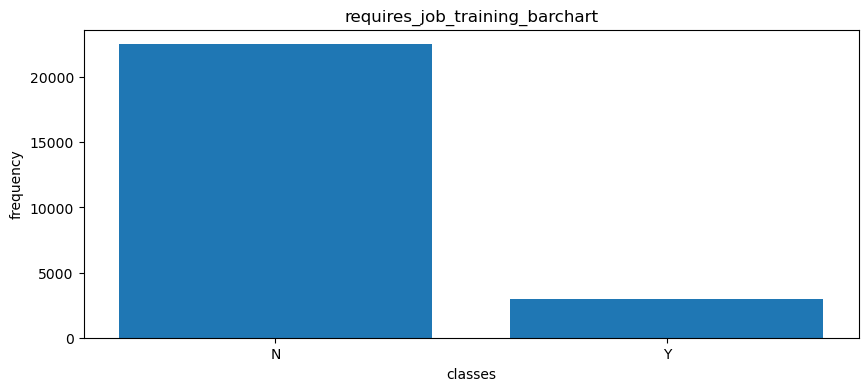

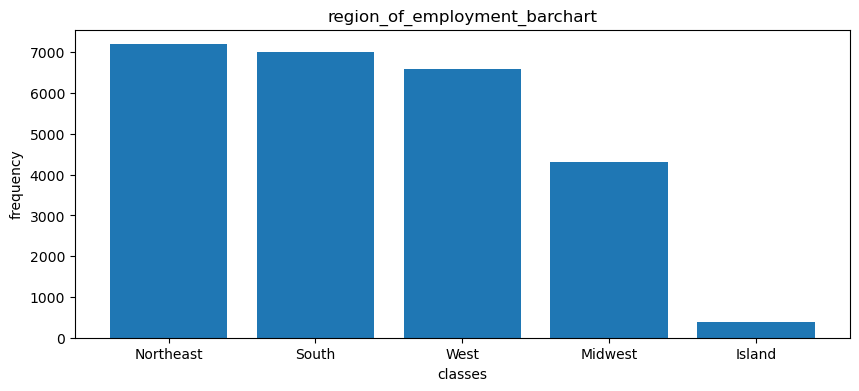

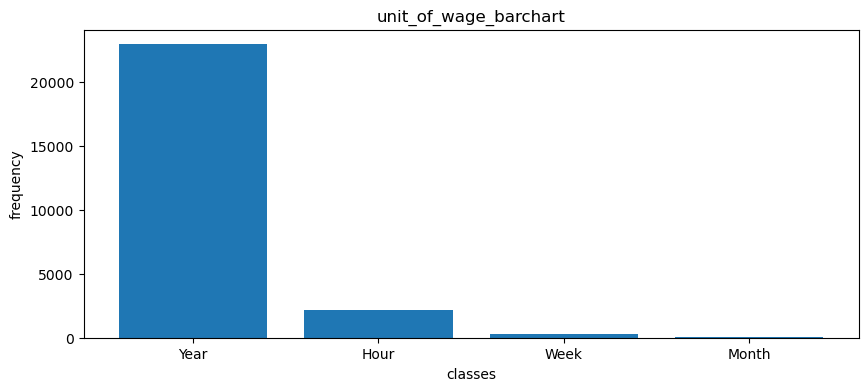

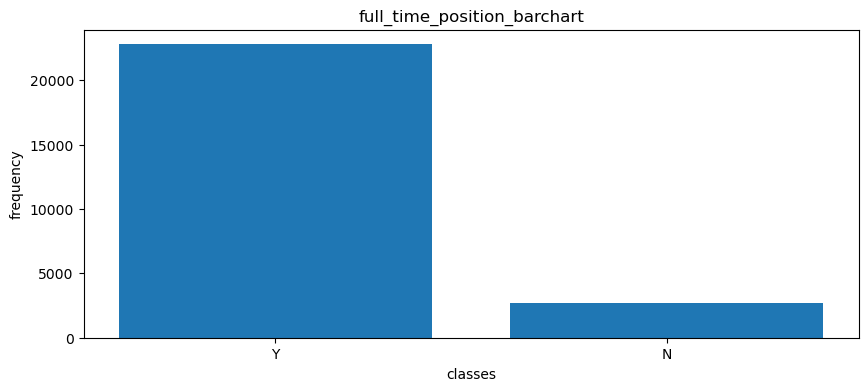

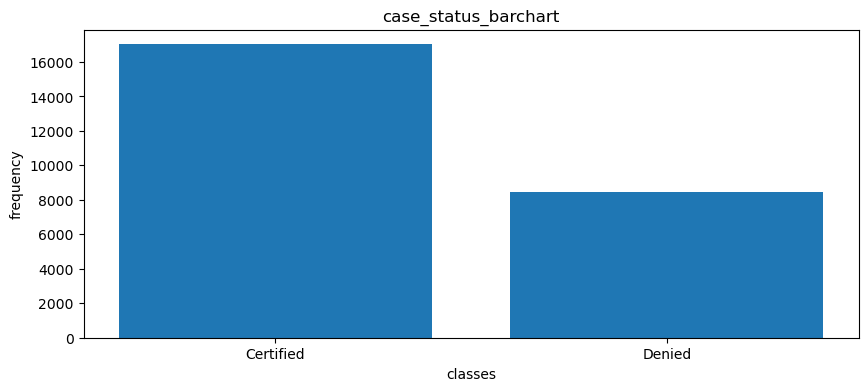

In [43]:
for i in cat[1:] :
    keys=visa_df[i].value_counts().keys()
    values=visa_df[i].value_counts().values
    plt.figure(figsize=(10,4))
    plt.bar(keys,values)
    plt.xlabel('classes')
    plt.ylabel('frequency')
    plt.title(f'{i}_barchart')

In [44]:
for i,j in enumerate(cat[1:]):
    print(i,j)

0 continent
1 education_of_employee
2 has_job_experience
3 requires_job_training
4 region_of_employment
5 unit_of_wage
6 full_time_position
7 case_status


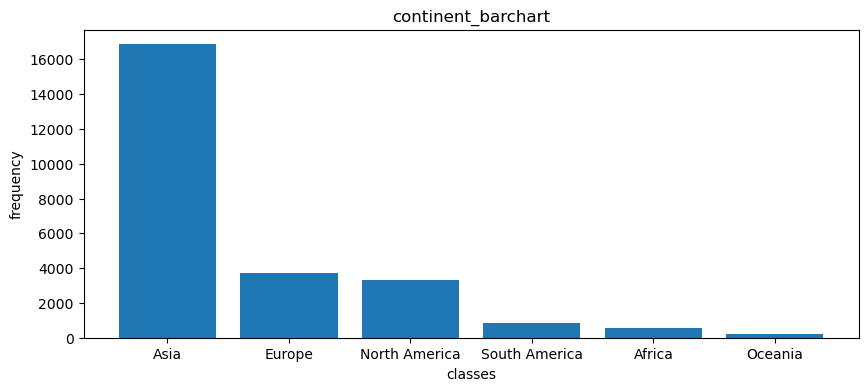

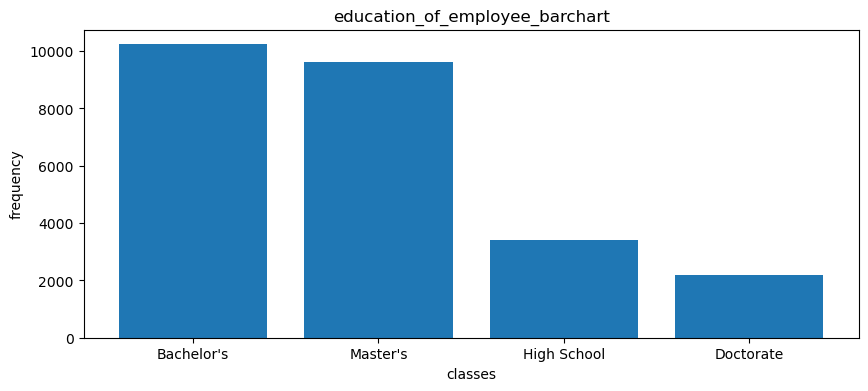

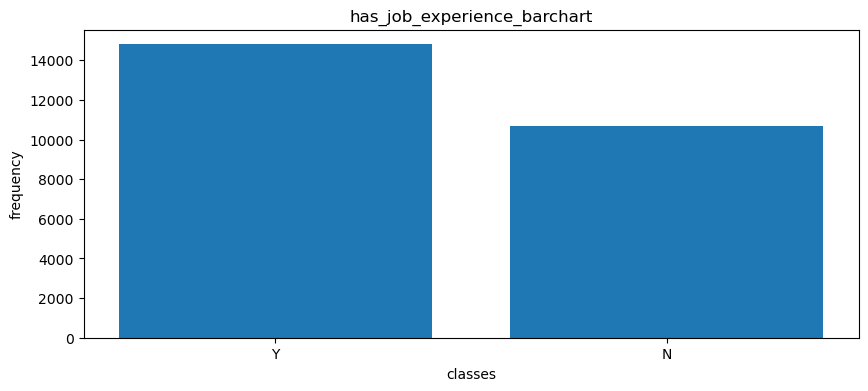

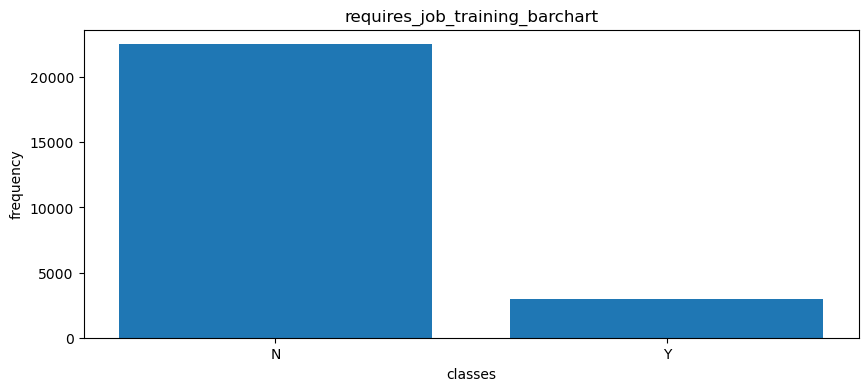

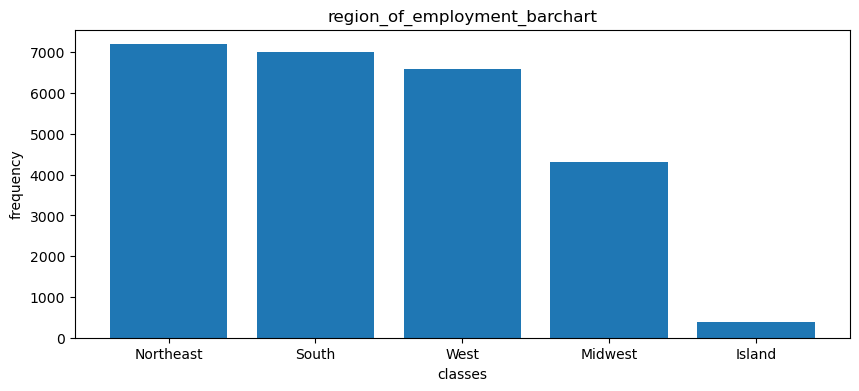

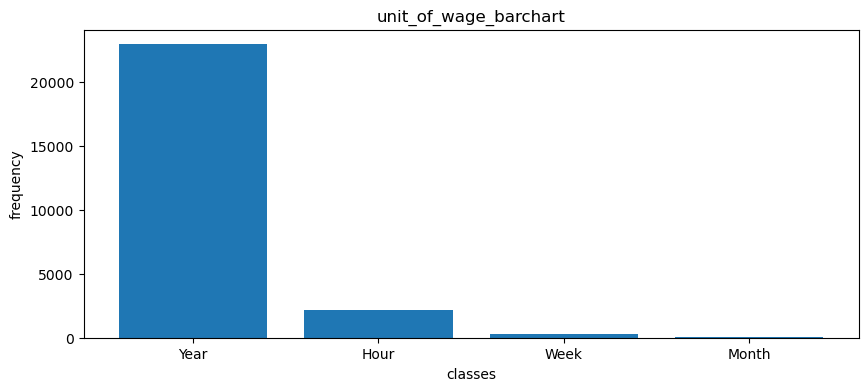

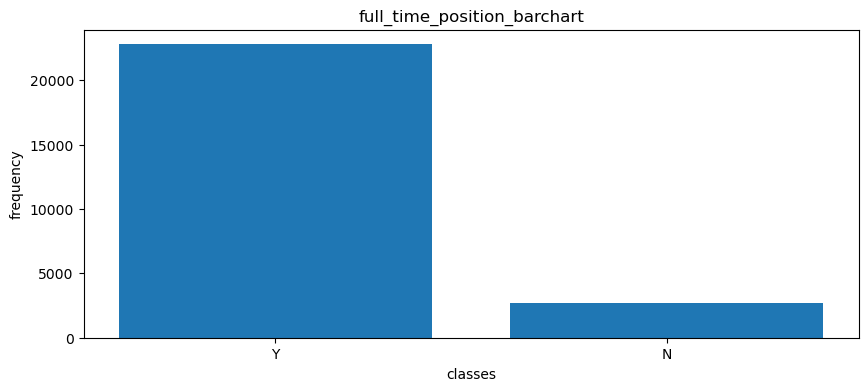

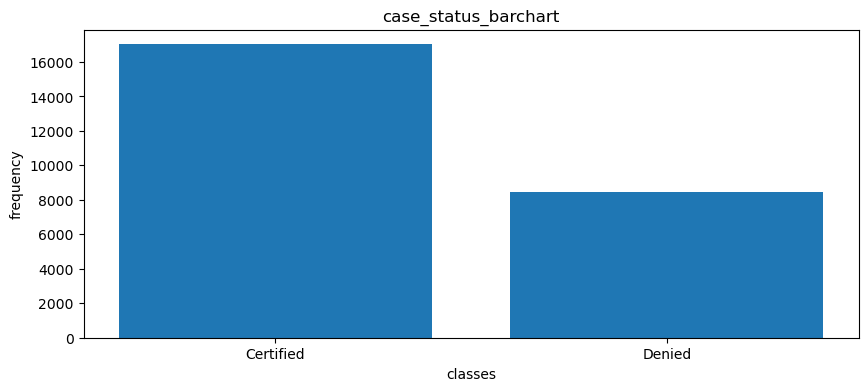

In [45]:
for i,j in enumerate(cat[1:]):
    keys=visa_df[j].value_counts().keys()
    values=visa_df[j].value_counts().values
    plt.figure(figsize=(10,4))
    plt.bar(keys,values)
    plt.xlabel('classes')
    plt.ylabel('frequency')
    plt.title(f'{j}_barchart')

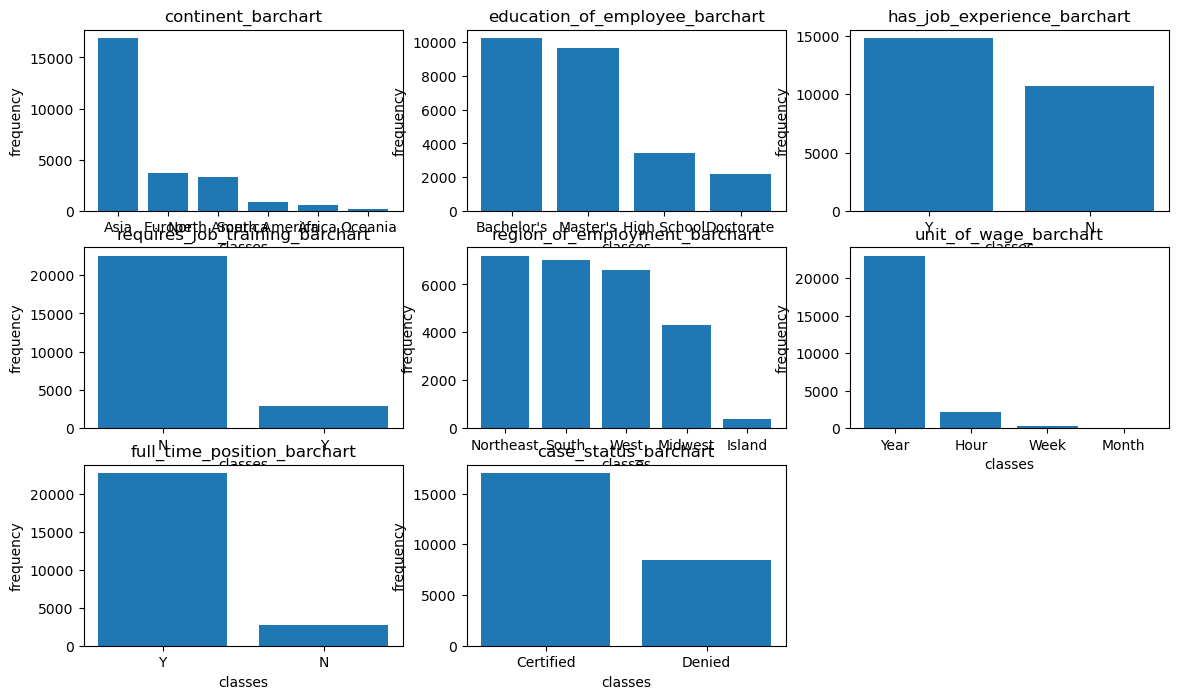

In [46]:
plt.figure(figsize=(14,8))
for i,j in enumerate(cat[1:]):
    keys=visa_df[j].value_counts().keys()
    values=visa_df[j].value_counts().values
    plt.subplot(3,3,i+1)
    plt.bar(keys,values)
    plt.xlabel('classes')
    plt.ylabel('frequency')
    plt.title(f'{j}_barchart')

In [47]:
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
df=pd.DataFrame(zip(keys,values),columns=['Class','Frequency'])
# df.to_csv('continent_df.csv',index=False)
df

,Class,Frequency
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


**Step:1 Create a Folder**

In [48]:
import os
folder_name='Frequency_table'
try:
    os.makedirs(folder_name)
except Exception as e:
    print(e)

In [49]:
os.makedirs('Frequency_table1',exist_ok=True)

**Step-2:Make a new path**

In [56]:
directory=os.getcwd()
folder_name='Frequency_table'
new_dir=os.path.join(directory,folder_name)
new_dir

'C:\\Users\\singh\\Desktop\\Data Scientist\\Naresh IT\\EDA\\Frequency_table'

**Step-3: Make a new location**

In [57]:
file_name='continent_df.csv'
path=os.path.join(new_dir,file_name)
path

'C:\\Users\\singh\\Desktop\\Data Scientist\\Naresh IT\\EDA\\Frequency_table\\continent_df.csv'

In [58]:
df.to_csv(path,index=False)

In [60]:
# Step-1:
folder_name='Frequency_table'
os.makedirs(folder_name,exist_ok=True)

#Step-2: Make a new path
directory=os.getcwd()
new_dir=os.path.join(directory,folder_name)

#Step-3:Create a Dataframe
for i in cat[1:]:
    keys=visa_df[i].value_counts().keys()
    values=visa_df[i].value_counts().values
    df=pd.DataFrame(zip(keys,values),
                   columns=['Class','Frequency'])

    #Step-4: Make the new path
    file_name=f'{i}_df.csv'
    path=os.path.join(new_dir,file_name)

    # Step-5: Save into dataframe
    df.to_csv(path,index=False)

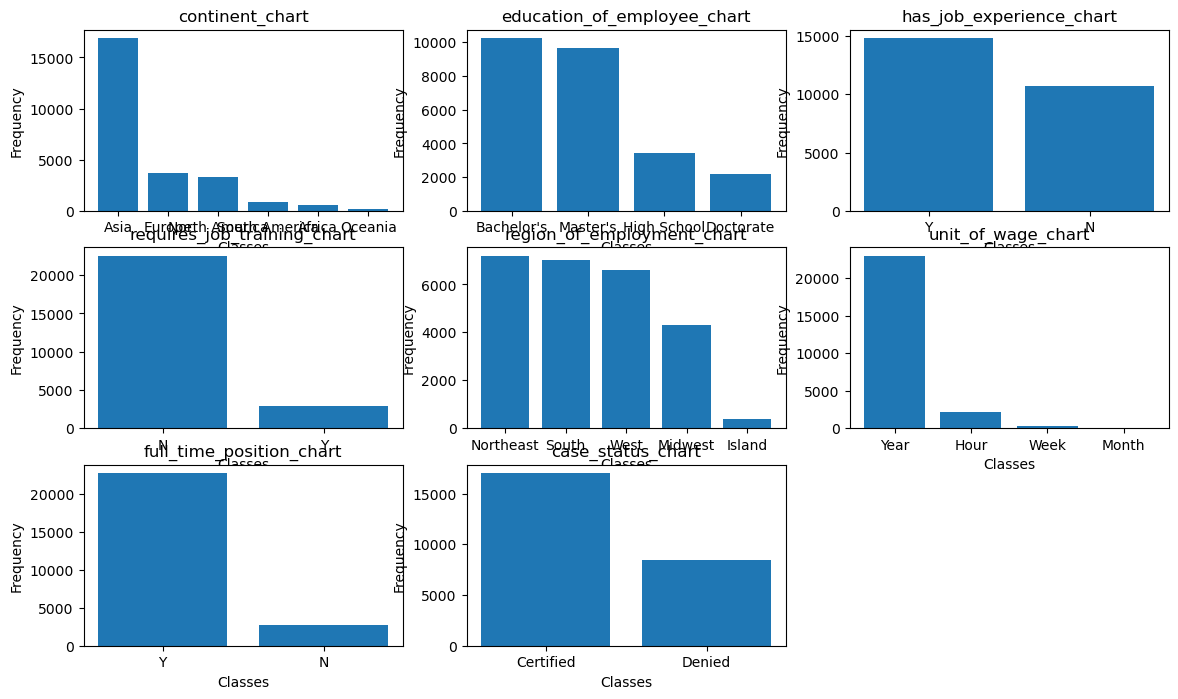

In [61]:
# step-1: Create a folder
folder_name='Bar_charts'
os.makedirs(folder_name, exist_ok=True)
# step-2: make a new path
directory=os.getcwd()
new_dir=os.path.join(directory,folder_name)

# step-3: Generating Bar charts
plt.figure(figsize=(14,8))
for i,j in enumerate(cat[1:]):
    keys = visa_df[j].value_counts().keys()
    values = visa_df[j].value_counts().values
    plt.subplot(3,3,i+1)
    plt.bar(keys,values)
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.title(f'{j}_chart')
